In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import PIL
%matplotlib inline

In [7]:
proposals = pd.read_csv('proposals.csv')

In [37]:
def invert_image(input_image):
    """inverts the input image color values. Returns image
    of same dim."""
    if not type(input_image) == type(np.array([0])):
        input_image = np.array(input_image)/256
    return (input_image - 256) * -1 

def normalize_image(input_image):
    """Takes a PIL image and "normalizes" its pixel values;
    returns a numpy array of same shape, with min value 0 and
    max value 256.
    """
    if not type(input_image) == type(np.array([0])):
        array = np.array(input_image)/256
    else:
        array = input_image/256
    min_ = np.min(np.min(array))
    array = array - min_
    max_ = np.max(np.max(array))
    array = array * 1/max_ * 256
    return array

In [74]:
def get_image(id_number):
    """Takes id number and returns an image."""
    path = './tp_images/' + id_number + '.bmp'
    try:
        img = PIL.Image.open(path)
    except:
        try:
            path = './fp_images/' + id_number + '.bmp'
            img = PIL.Image.open(path)
        except:
            raise('Error: No file associated with ', id_number)
    return np.array(img)

def remove_ticks(ax_obj):
    """takes an ax object from matplotlib and removes ticks."""
    ax_obj.tick_params(
        axis='both', 
        which='both', 
        bottom='off', 
        top='off', 
        labelbottom='off', 
        right='off', 
        left='off', 
        labelleft='off'
        )
    return ax_obj

def show_example(id_number):
    """Takes example id number and shows it for user inspection."""
    img = get_image(id_number)
    #Plot "zoomed in"
    fig, ax = plt.subplots(nrows=1, ncols=2)
    ax[0].set_title('natural')
    ax[0].imshow(img, cmap='Greys')
    ax[0] = remove_ticks(ax[0])
    ax[1].set_title('inverted')
    ax[1].imshow(invert_image(img), cmap='Greys')
    ax[1] = remove_ticks(ax[1])
    plt.tight_layout()
    
    #Plot "actual size"
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(2, 28/80))
    ax[0].set_title('natural')
    ax[0].imshow(img, cmap='Greys')
    ax[0] = remove_ticks(ax[0])
    ax[1].set_title('inverted')
    ax[1].imshow(invert_image(img), cmap='Greys')
    ax[1] = remove_ticks(ax[1])
    return

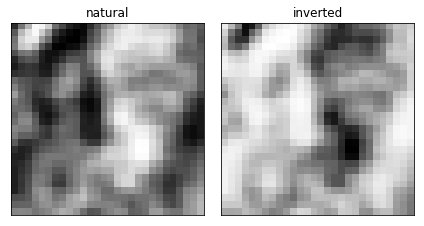

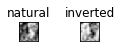

In [75]:
show_example(proposals['id'].loc[10])

In [76]:
len(proposals)

4910